#Hypothesis testing: Chi-Square Test



Source: "Practical Statistics for Data Scientists" (124 - 126).

In this notebook we'll show you how to calculate a chi-square test. We'll do this twice. 
* First, we'll go through the approach manually so you can see the maths and reasoning behind what we're doing - this should help with comprehension and help you to design better experiments.
* Second, we'll go through the shorter coding way, where a computer will do all the work for you, but won't tell you why, it's a black box of numbers.

# I. The manual approach

## 1.&nbsp; Define the initial question for which the truth is not known.

Let's say we created 3 different versions of a website. Each got 1000 visits last week.

On each website, we placed a button with a link to something super cool.

But: the buttons on the 3 websites look slightly different!

Now we want to know whether one of the versions is much better than the others, and to an extent that this is unlikely to be explained by chance alone. Therefore, we track the number of clicks on each of the versions.

## 2.&nbsp; State the Null Hypothesis and the Alternative Hypothesis.

Null Hypothesis ($H_0$): click rate(version A) = click rate(version B) = click rate(version C)

Alternative Hypothesis ($H_A$): at least one of the versions has a significantly better or worse click rate than the others

## 3.&nbsp; Select an appropriate significance level alpha ($\alpha$).

Commonly used levels are 0.1, 0.05 and 0.01.

Since we think that the colour of a button will probably not change the course of history, a comfortable alpha of 0.1 will be well-suited.

In [ ]:
alpha = 0.1

## 4.&nbsp; Consider the statistical assumptions about the set of data.

Statology is a great website to find out more and guide you on what assumptions should be made. [Here's their page on the chi-square test](https://www.statology.org/chi-square-test-assumptions/).

4 assumptions need to be met:

1. Both variables are categorical.

2. All observations are independent.

3. Cells in the contingency table are mutually exclusive.

4. The sample size is large enough (at least 5 observations in each of the cells).

### 4.1&nbsp; Both variables are categorical.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Observed results
Click = [14, 8, 12]
No_click = [986, 992, 988]

# Display the data in the form of a contingency table
observed = pd.DataFrame([Click, No_click],
                           columns = ["A", "B", "C"],
                           index = ["Click", "No-click"])
observed

,A,B,C
Click,14,8,12
No-click,986,992,988


Both the versions (A, B, and C) and the results (click, no-click) are categories.

Condition fulfilled.

### 4.2&nbsp;All observations are independent.

This needs to be ensured while collecting the data. At this point, we will assume that the visitors to the website were allocated randomly and did not influence each other, and that thus, their clicks are independent.

Condition fulfilled.

### 4.3&nbsp;Cells in the contingency table are mutually exclusive.

Technically, this needs to be ensured while collecting the data. Logically, any visitor's behaviour can only be described using one single column (A, B or C) and one single row (click or no-click), meaning that the cells are mutually exclusive.

Condition fulfilled.

### 4.4&nbsp;The sample size is large enough (at least 5 observations in each of the cells).

In [ ]:
observed

,A,B,C
Click,14,8,12
No-click,986,992,988


There are more than 5 observations in each of the cells.

Condition fulfilled.

## 5.&nbsp; Decide on the appropriate test to use and the associated test statistic.

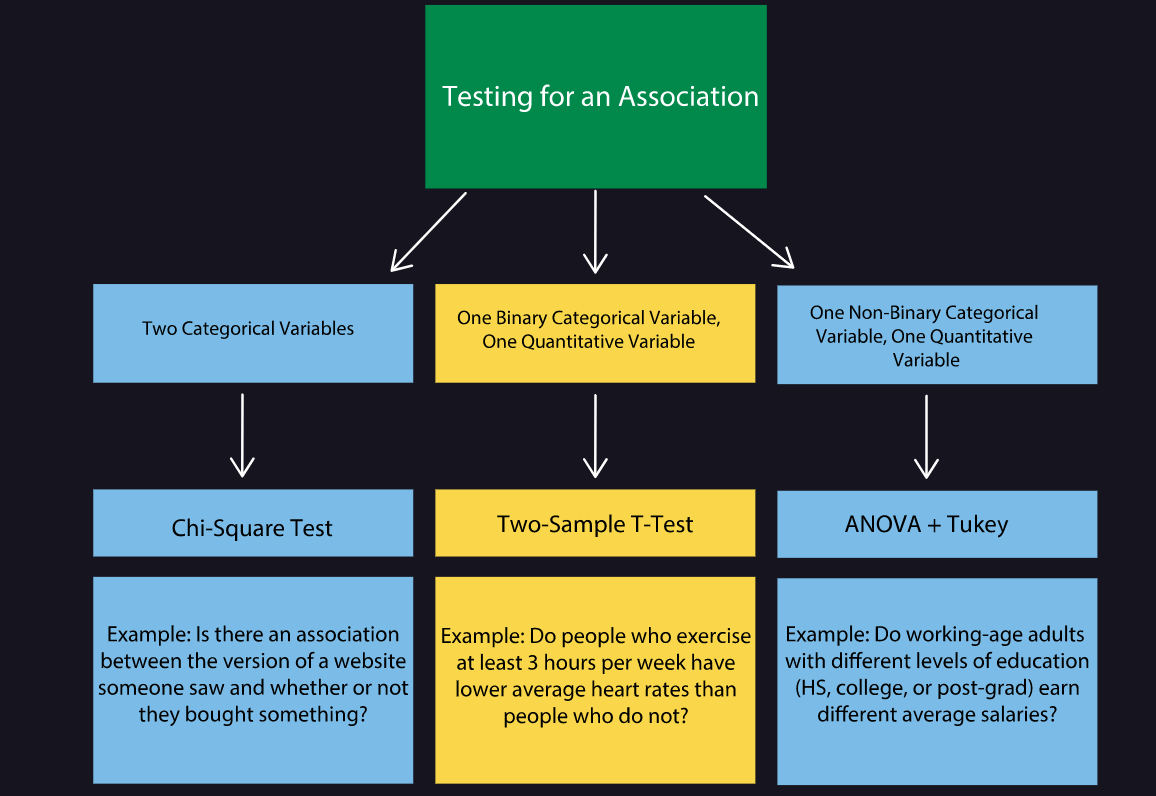

Comparing the observed frequencies to the expected frequencies in one or more categories of a contingency table is done using a **Chi-squared test**.

The associated test statistic is the chi-squared test statistic: 
$\chi^2_c = \sum_{\substack{0\le i\le n\\0\le j\le r}}\frac{(O_{ij}-E_{ij})^2} {E_{ij}}$

where

c = degrees of freedom

n = total number of columns

r = total number of rows

$O_{ij}$ = observed value in the ith column and jth row

$E_{ij}$ = expected value in the ith column and jth row

## 6.&nbsp; Derive the distribution of the test statistic under the Null Hypothesis from the assumptions.

Again, this section is very theoretical, and there is no need to plot all these distributions. We do it here to help deepen your understanding of what is happening when you perform a chi-squared test.

The chi-squared test statistic follows a chi-squared distribution with c degrees of freedom.
The shape of the contingency table determines c:

c = (number of rows - 1) * (number of columns - 1)

In [ ]:
degrees_of_freedom = (observed.shape[0] - 1) * (observed.shape[1] - 1)
degrees_of_freedom

2

Let's plot a few chi squared distributions with different degrees of freedom.

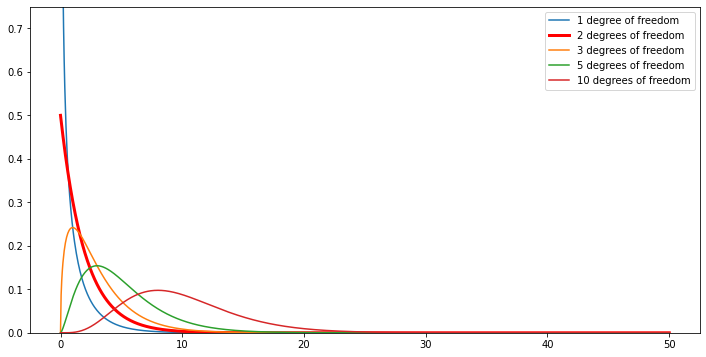

In [ ]:
#@title Chi-squared distributions with different degrees of freedom

import numpy as np
from scipy.stats import chi2

plt.figure(figsize=(12,6))
# Create a linear space from 0 to 50 with 1000 intervals for our x-axis.
xt = np.linspace(0,50,1000)
# Show values on the y-axis between 0 and 0.75.
plt.ylim(0, 0.75)
# Plot chi-squared distributions with different degrees of freedom.
plt.plot(xt, chi2.pdf(xt,1), label="1 degree of freedom")
plt.plot(xt, chi2.pdf(xt,2), color="red", lw=3, label="2 degrees of freedom")
plt.plot(xt, chi2.pdf(xt,3), label="3 degrees of freedom")
plt.plot(xt, chi2.pdf(xt,5), label="5 degrees of freedom")
plt.plot(xt, chi2.pdf(xt,10), label="10 degrees of freedom")
plt.legend()
plt.show()

## 7.&nbsp; Compute the test statistic using the data set.

Remember that $\chi^2_c = \sum_{\substack{0\le i\le n\\0\le j\le r}}\frac{(O_{ij}-E_{ij})^2} {E_{ij}}$

In the case  of equal frequencies, we would have expected all of the three versions to have equal click and no-click rates. In that case, the difference between observed and expected value would have been 0 for all i, as well as the sum, i.e. the test statistic.

The square root of each of the components of the test statistic is called the **Pearson residual**. It is a normalized measure of how different the observed and the expected values are: $\frac{O_{ij}-E_{ij}}{\sqrt{E_{ij}}}$.

To get the test statistic, we will need to calculate the Pearson residual for each row-column combination, i.e. for each cell in the contingency table. 

And to calculate the Pearson residuals, we will need to know the expected values for each of these cells. "Expected" means a perfectly equal distribution of clicks and no-clicks across the three versions, as stated by the Null Hypothesis. In order to calculate these values, we need to know the total numbers of clicks and no-clicks each.

In [ ]:
# Total number of clicks.
total_clicks = observed.iloc[0].sum()
total_clicks

34

In [ ]:
# Total number of no-clicks.
total_no_clicks = observed.iloc[1].sum()
total_no_clicks

2966

In [ ]:
# The expected number of clicks for each version is the total number of clicks divided by the number of versions.
# The expected number of no-clicks for each version is the total number of no-clicks divided by the number of versions.
Click_e = [total_clicks/3, total_clicks/3, total_clicks/3]
No_click_e = [total_no_clicks/3, total_no_clicks/3, total_no_clicks/3]

# Display the data in the form of a contingency table.
expected = pd.DataFrame([Click_e, No_click_e],
                           columns = ["A", "B", "C"],
                           index = ["Click", "No-click"])
expected

,A,B,C
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


Compare this to the observed values.

In [ ]:
observed

,A,B,C
Click,14,8,12
No-click,986,992,988


Let's calculate the Pearson residuals for all the cells by first looking at the different versions in the clicks row, then the versions in the no-clicks row.

In [ ]:
# i = 0 (Click, version A)
X0 = (observed["A"][0] - expected["A"][0]) / np.sqrt(expected["A"][0])
X0

0.7921180343813392

In [ ]:
# i = 1 (Click, version B)
X1 = (observed["B"][0] - expected["B"][0]) / np.sqrt(expected["B"][0])
X1

-0.9901475429766744

In [ ]:
# i = 2 (Click, version C)
X2 = (observed["C"][0] - expected["C"][0]) / np.sqrt(expected["C"][0])
X2

0.19802950859533466

In [ ]:
# i = 3 (No-click, version A)
X3 = (observed["A"][1] - expected["A"][1]) / np.sqrt(expected["A"][1])
X3

-0.08480936007749452

In [ ]:
# i = 4 (No-click, version B)
X4 = (observed["B"][1] - expected["B"][1]) / np.sqrt(expected["B"][1])
X4

0.10601170009687087

In [ ]:
# i = 5 (No-click, version C)
X5 = (observed["C"][1] - expected["C"][1]) / np.sqrt(expected["C"][1])
X5

-0.02120234001937273

In [ ]:
# Square all residuals and add them up 
chi_squared = X0**2 + X1**2 + X2**2 + X3**2 + X4**2 + X5**2
chi_squared

1.6659394708658917

Alternatively, this can be calculated using a nested for loop...

In [ ]:
residuals = []
columns = observed.columns
for column in columns:
  for category in range(observed.shape[0]):
    residuals.append(((observed[column][category] - expected[column][category]) / np.sqrt(expected[column][category]))**2)

sum(residuals)

1.6659394708658917

... or by defining a function that returns all the residuals which will be added up as a second step.

In [ ]:
# Define the function and show the dataframe with all the residuals.
def pearson_residuals(contingency_observed, contingency_expected):
    R = (contingency_observed - contingency_expected) / (np.sqrt(contingency_expected))
    return R

p_residuals = pearson_residuals(observed, expected)
p_residuals

,A,B,C
Click,0.792118,-0.990148,0.198030
No-click,-0.084809,0.106012,-0.021202


In [ ]:
# Square all the residuals.
p_residuals_squared = p_residuals ** 2
p_residuals_squared

,A,B,C
Click,0.627451,0.980392,0.039216
No-click,0.007193,0.011238,0.000450


In [ ]:
# Add all the squared residuals to get the test statistic.
test_statistic = p_residuals_squared.values.sum()
test_statistic

1.6659394708658917

Let's compare them.

In [ ]:
chi_squared == sum(residuals) == test_statistic

True

SUCCESS! They all give the exact same result!

Let's see where the chi-squared test statistic is in the plot of the chi-squared distribution.

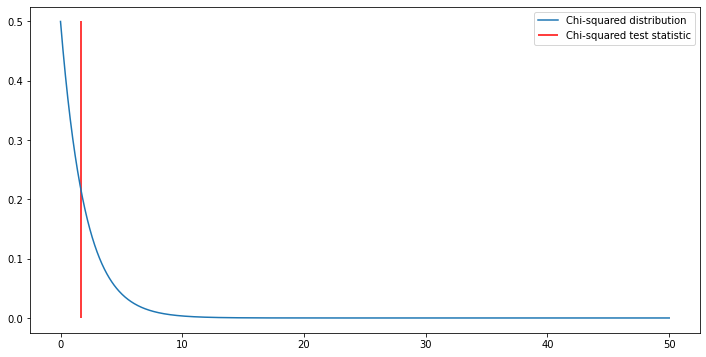

In [ ]:
#@title Chi-squared distribution and test statistic
plt.figure(figsize=(12,6))
# Create a linear space from 0 to 50 with 1000 intervals for our x-axis.
xt = np.linspace(0,50,1000)
# Plot a chi-squared distribution with the degrees of freedom from our sample.
plt.plot(xt, chi2.pdf(xt,degrees_of_freedom), label="Chi-squared distribution")
# Add a vertical line for the chi-squared test statistic.
plt.vlines(chi_squared, ymin=0, ymax=max(chi2.pdf(xt,degrees_of_freedom)), color="red", label="Chi-squared test statistic")
plt.legend()
plt.show()

## 8.&nbsp; Derive the critical region associated with the level of alpha.

Not too long ago, people used large tables to look up the critical values associated with a certain level of alpha, such as the one for the chi-squared test statistic below from [here](https://www.statology.org/how-to-read-chi-square-distribution-table/).

In the columns at the top, you need to select the level of alpha. In our case, alpha is 0.1.

Then you select the degrees of freedom of the test statistic's distribution in the first row. For any distribution with a different degree of freedom than the ones listed, the critical value will only be an approximation. In our case, the degrees of freedom is 2.

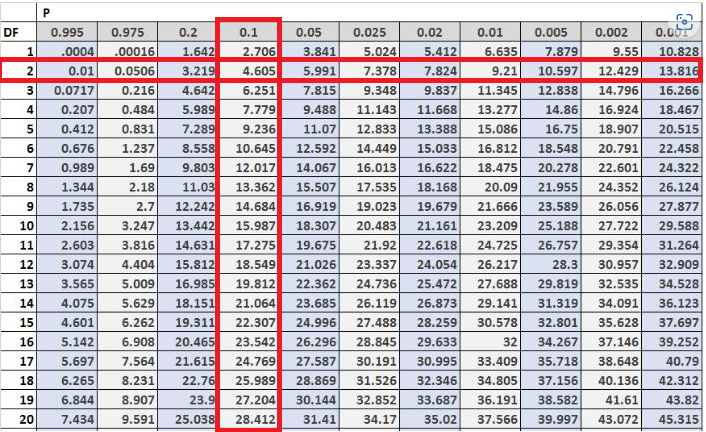

In [ ]:
critical_value = 4.605

Let's plot the chi-squared distribution with our test statistic again.

This time, we want to add the critical value in order to determine the critical region.

Notice that the area shaded in blue under the distribution curve covers all values on the x-axis that are more extreme than our critical value. This area is the alpha, and corresponds thus to about 10% of the total area under the curve.

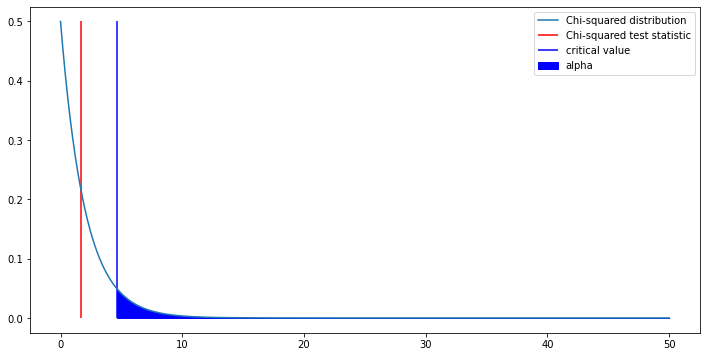

In [ ]:
# @title Chi-squared distribution, test statistic and critical region
plt.figure(figsize=(12,6))
# Plot a chi-squared distribution with the degrees of freedom from our sample.
plt.plot(xt, chi2.pdf(xt,degrees_of_freedom), label="Chi-squared distribution")
# Add a vertical line for the chi-squared test statistic.
plt.vlines(chi_squared, ymin=0, ymax=max(chi2.pdf(xt,degrees_of_freedom)), color="red", label="Chi-squared test statistic")
# Add vertical line for the critical value.
plt.vlines(critical_value, ymin=0, ymax=max(chi2.pdf(xt,degrees_of_freedom)), color="blue", label="critical value")
# Shade the area under the curve for values more extreme than the critical value (= alpha).
plt.fill_between(xt, chi2.pdf(xt,degrees_of_freedom), where=(xt>critical_value), color= "b", label="alpha")
plt.legend()
plt.show()

## 9.&nbsp; Compare the test statistic with the critical values.

The test statistic is not in the critical region because it is not more extreme than the critical value.

For this reason, the Null Hypothesis will not be rejected.

We can not assume that any of the three different versions of the website performed significantly better or worse than the others. On the contrary, it is quite likely that they all are perceived as quite identical by the visitors to the website.

# II.&nbsp;The coder's approach

The faster way is to use [scipy's function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.chi2_contingency.html) to perform chi-squared tests.

To determine whether or not to reject the Null Hypothesis, it is common to compare the alpha to the so-called p-value (instead of comparing the test statistic to the critical region).

> **Note**: Whether you compare alpha to the p-value or the test statistic to the critical values/regions is a matter of personal taste. The result itself will always be the same.

You can see this in the chart below:

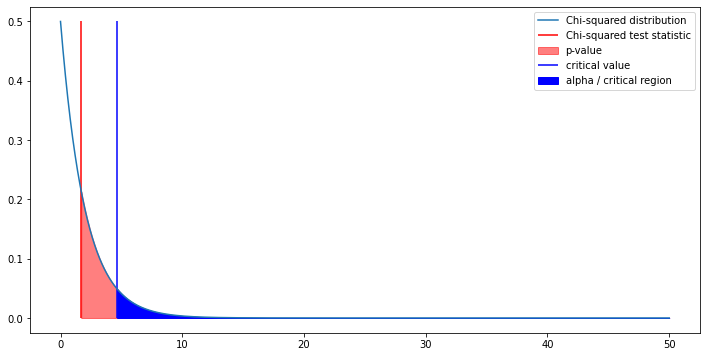

In [ ]:
# @title Chi-squared distribution, test statistic, critical value and alpha
plt.figure(figsize=(12,6))
# Plot a chi-squared distribution with the degrees of freedom from our sample.
plt.plot(xt, chi2.pdf(xt,degrees_of_freedom), label="Chi-squared distribution")
# Add a vertical line for the chi-squared test statistic.
plt.vlines(chi_squared, ymin=0, ymax=max(chi2.pdf(xt,degrees_of_freedom)), color="red", label="Chi-squared test statistic")
# Shade the region in the tails that is more extreme than the test statistic (= p-value).
plt.fill_between(xt, chi2.pdf(xt,degrees_of_freedom), where=(xt>chi_squared), color= "r", alpha=0.5, label="p-value")
# Add vertical line for the critical value.
plt.vlines(critical_value, ymin=0, ymax=max(chi2.pdf(xt,degrees_of_freedom)), color="blue", label="critical value")
# Shade the area under the curve for values more extreme than 4.6 (= alpha).
plt.fill_between(xt, chi2.pdf(xt,degrees_of_freedom), where=(xt>critical_value), color= "b", label="alpha / critical region")
plt.legend()
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chisq, pvalue, df, expected = chi2_contingency(observed)
chisq

1.6659394708658917

In [ ]:
pvalue

0.4347562562343731

In [ ]:
df

2

In [ ]:
expected

array([[ 11.33333333,  11.33333333,  11.33333333],
       [988.66666667, 988.66666667, 988.66666667]])

Check whether the chi-squared test statistic calculated manually and the one calculated using scipy are the same.

In [ ]:
chi_squared == chisq

True

SUCCESS!

In [ ]:
if pvalue > alpha:
  print("The p-value is larger than alpha.")
else:
  print("The p-value is smaller than alpha.")

The p-value is larger than alpha.


Does this mean that we should reject the Null Hypothesis - or not?

Since the p-value is (much) larger than alpha, we do not reject the Null Hypothesis.

# III.&nbsp;Exercise

You have tested 2 versions A and B of the "SHOP NOW" button on Eniac's website. 

After the experiment is complete, these are the results:

- Version A: 134 clicks, 8391 visits.
- Version B: 102 clicks, 4512 visits.

##Exercise solution

Follow these steps:
1. Define the initial question.
2. Establish the Null and the Alternative Hypotheses.
3. Define your alpha.
4. Consider the statistical assumptions.
5. Decide on the test and test statistic.
6. Derive the distribution of the test statistic.
7. Compute the test statistic.
8. Derive the p-value.
9. Compare alpha and the p-value and state the result of the experiment.

### 1.&nbsp;Define the initial question.

Did one of the two versions perform significantly better than the other?

### 2.&nbsp;Establish the Null and the Alternative Hypotheses.

Null Hypothesis: CTR(version A) = CTR(version B)

Alternative Hypothesis: CTR(version A) != CTR(version B)

### 3.&nbsp;Define your alpha.

Common values are 0.1, 0.05 and 0.01. Let's go with the least restrictive one and pick 0.1.

In [ ]:
alpha_2 = 0.1

### 4.&nbsp;Consider the statistical assumptions.

4 assumptions need to be met:
1. Both variables are categorical.
2. All observations are independent.
3. Cells in the contingency table are mutually exclusive.
4. The sample size is large enough (at least 5 observations in each of the cells of the table with expected values).

All assumptions are met or we will assume they are.

In [ ]:
click = [134, 102]
no_click = [8391, 4512]

observed_2 = pd.DataFrame([click, no_click], columns=["A", "B"], index=["Click", "No-click"])
observed_2

,A,B
Click,134,102
No-click,8391,4512


### 5.&nbsp;Decide on the test and test statistic.

Comparing the observed frequencies to the expected frequencies in one or more categories of a contingency table is done using a Chi-squared test.

### 6.&nbsp;Derive the distribution of the test statistic.

The chi-squared test statistic follows a chi-squared distribution with c degrees of freedom. The shape of the contingency table determines c:

c = (number of rows - 1) * (number of columns - 1)

### 7.&nbsp;Compute the test statistic.

> Note: For a 2x2 contingency table, the degrees of freedom is 1. In these cases, the default scipy approach is to apply a so-called Yates' continuity correction. While it might be useful to follow this approach in other cases (especially in cases of a few observations only), we do not want to apply the correction in our case. Therefore, we need to set `correction=False` which ensures that the manual and the scipy approach yield the same result.

In [ ]:
chisq_2, pvalue_2, df_2, expected_2 = chi2_contingency(observed_2, correction=False)

### 8.&nbsp;Derive the p-value.

In [ ]:
pvalue_2

0.008495128506826424

### 9.&nbsp;Compare alpha and the p-value and state the result of the experiment.

In [ ]:
if pvalue_2 > alpha_2:
  print("The p-value is larger than alpha.")
else:
  print("The p-value is smaller than alpha.")

The p-value is smaller than alpha.


If the p is low, the Null must go!

Since the p-value is smaller than alpha, we will reject the Null Hypothesis. Therefore, the two versions have not performed equally well.

In [ ]:
# Calculate CTR for version A
CTR_A = observed_2.loc["Click", "A"] / sum(observed_2["A"])
CTR_A

0.015718475073313785

In [ ]:
# Calculate CTR for version B
CTR_B = observed_2.loc["Click", "B"] / sum(observed_2["B"])
CTR_B

0.022106631989596878

In [ ]:
if CTR_A > CTR_B:
  print("A is the winner version")
else:
  print("B is the winner version")

B is the winner version
